Load in the elements annotated with mutation rate and genomic features:

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
elements = pd.read_table("../data/whole_genome_sliding.2kb_bins.mut_rates.reduced_annotation.coverage_added.constraint.txt")

In [114]:
elements.shape

(1334689, 88)

In [115]:
elements.apply(pd.isnull).sum()

chr                                        0
start                                      0
end                                        0
chunk                                      0
region_id                                  0
p_snp_phylop_lt_0                          0
p_snp_phylop_lt_1                          0
p_snp_phylop_lt_2                          0
p_snp_phylop_lt_3                          0
p_snp_phylop_lt_4                          0
p_snp_phylop_lt_5                          0
p_snp_phylop_lt_6                          0
p_snp_total                                0
p_snp_phylop_gt_0                          0
p_snp_phylop_gt_1                          0
replication_timing_Koren_LCLs           1640
replicating_timing_DingKoren_ESCs       4869
recombination_rate_Kong                    0
recombination_rate_1000G_phase3            0
ovary_DNase                                0
hSSC_ATAC                                  0
hESC_ATAC                                  0
ovary_H3K2

In [116]:
elements['meta_observed_CA_prop'] = elements.meta_observed_CA_neutral/elements.meta_observed_neutral
elements['meta_observed_CG_prop'] = elements.meta_observed_CG_neutral/elements.meta_observed_neutral
elements['meta_observed_CT_prop'] = elements.meta_observed_CT_neutral/elements.meta_observed_neutral
elements['meta_observed_TA_prop'] = elements.meta_observed_TA_neutral/elements.meta_observed_neutral
elements['meta_observed_TC_prop'] = elements.meta_observed_TC_neutral/elements.meta_observed_neutral
elements['meta_observed_TG_prop'] = elements.meta_observed_TG_neutral/elements.meta_observed_neutral

In [117]:
elements.dropna(axis = 0, inplace = True)
elements.shape

(1318217, 94)

In [118]:
elements.to_csv("../data/whole_genome_sliding.2kb_bins.mut_rates.reduced_annotation.coverage_added.constraint.post_FEng.txt", sep = "\t")

In [119]:
np.nanpercentile(elements.median_coverage_gnomad, range(5,100,5))

array([ 28. ,  29. ,  30. ,  30. ,  30. ,  30. ,  30.5,  31. ,  31. ,
        31. ,  31. ,  31. ,  31. ,  31. ,  31. ,  31. ,  32. ,  32. ,  32. ])

In [120]:
np.nanpercentile(elements.median_coverage_BRIDGE, range(5,100,5))

array([ 32.,  33.,  33.,  34.,  34.,  35.,  35.,  35.,  35.,  36.,  36.,
        36.,  36.,  37.,  37.,  37.,  37.,  38.,  38.])

In [121]:
np.nanpercentile(elements.low_qual_prop_BRIDGE, range(5,100,5))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01290323,  0.02564103,
        0.04316547,  0.06622517,  0.09558824,  0.13333333,  0.1827957 ,
        0.24516129,  0.3255814 ,  0.44029851,  0.65900383])

In [122]:
np.nanpercentile(elements.low_qual_prop_gnomad, range(5,100,5))

array([ 0.        ,  0.        ,  0.        ,  0.0173913 ,  0.02083333,
        0.02352941,  0.02702703,  0.03333333,  0.04040404,  0.04597701,
        0.05263158,  0.06      ,  0.06818182,  0.07792208,  0.08928571,
        0.1037037 ,  0.12280702,  0.15217391,  0.21978022])

In [81]:
np.nanpercentile(elements.p_snp_phylop_lt_0/elements.p_snp_total, range(5,100,5))

array([ 0.22892273,  0.29042433,  0.3300104 ,  0.35763711,  0.37778733,
        0.39354531,  0.40665391,  0.41797539,  0.42812169,  0.43758849,
        0.44652102,  0.45532539,  0.46411577,  0.47302034,  0.48246268,
        0.49289562,  0.50502903,  0.52091119,  0.5469796 ])

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-white')


In [ ]:
s = sns.lmplot(data = elements, x = "p_snp_phylop_lt_0", y = "meta_observed_neutral", fit_reg = False, sharex=False,sharey=False)
s.set(xlim=(min(elements.p_snp_phylop_lt_0), max(elements.p_snp_phylop_lt_0)))

In [ ]:
np.corrcoef(elements.meta_observed_neutral, elements.p_snp_phylop_lt_0/elements.p_snp_total)

In [126]:
LR = LinearRegression()
X = elements.loc[:, ['p_snp_phylop_lt_0', 'low_qual_prop_BRIDGE', 'low_qual_prop_gnomad',
                     'median_coverage_BRIDGE', 'median_coverage_gnomad', 'meta_observed_neutral']]

In [127]:
X.shape

(1318217, 6)

In [128]:
y = X['meta_observed_neutral']
X.drop('meta_observed_neutral', axis = 1, inplace=True)

In [129]:
y.shape

(1318217,)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [133]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
y_pred = LR.predict(X_test)

In [136]:
LR.score(X_train, y_train)

0.63585522836167363

In [137]:
LR.score(X_test, y_test)

0.63543080584126344

In [138]:
np.percentile(y_test, 95)

124.0

In [139]:
np.percentile(y_test, 5)

27.0

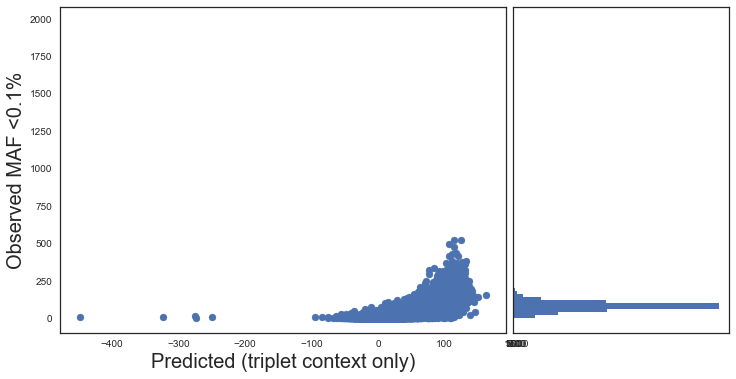

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


x = y_pred
y = y_test


fig, axScatter = plt.subplots(figsize=(12, 6))

# the scatter plot:
axScatter.scatter(x, y)

plt.xlabel('Predicted (triplet context only)', size = 20)
plt.ylabel('Observed MAF <0.1%', size = 20)
ax.tick_params(axis='both', which='major', labelsize=12)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHisty = divider.append_axes("right", 3, pad=0.1, sharey=axScatter)

# make some labels invisible
axHisty.yaxis.set_tick_params(labelleft=False)

axHisty.hist(y, bins=range(0,2000,20), orientation='horizontal')
axHisty.set_xticks([0,500,1000, 1500, 2000])


plt.draw()
plt.show()

## Random forest regression incorporating all of the features:

In [141]:
from sklearn.ensemble import RandomForestRegressor

#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [148]:
#RFR = RandomForestRegressor(max_depth = 100, max_features = 'sqrt', min_samples_leaf = 10, min_samples_split = 20, n_estimators = 1000, n_jobs=-1, verbose = 4)
RFR = RandomForestRegressor(n_estimators = 1000, max_depth = 100, max_features = int(np.round(X.shape[1]/2)), min_samples_leaf = 10, min_samples_split = 20, n_jobs=-1, verbose = 4)
RFR_no_spectrum = RandomForestRegressor(n_estimators = 1000, max_depth = 100, max_features = int(np.round(X.shape[1]/2)), min_samples_leaf = 10, min_samples_split = 20, n_jobs=-1, verbose = 4)

#RFR = AdaBoostRegressor(DecisionTreeRegressor(min_samples_split=10),n_estimators=1000)
#params = {'n_estimators': 100, 'max_depth': 100, 'min_samples_split': 20, 'min_samples_leaf' : 10, 'learning_rate': 0.01, 'loss': 'ls', 'verbose': 4}
#RFR = GradientBoostingRegressor(**params)

In [149]:
X = elements.loc[:, ['p_snp_phylop_lt_0', 'low_qual_prop_BRIDGE', 'low_qual_prop_gnomad',
                     'meta_observed_CA_prop', 'meta_observed_CT_prop', 'meta_observed_CG_prop',
                     'meta_observed_TA_prop','meta_observed_TC_prop','meta_observed_TG_prop',
                     'median_coverage_BRIDGE', 'median_coverage_gnomad', 
                     'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 
                     'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'meta_observed_neutral']]
X.dropna(axis=0,inplace=True)
y = X['meta_observed_neutral']
X.drop('meta_observed_neutral', axis = 1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
RFR.fit(X_train, y_train)

building tree 1 of 1000building tree 3 of 1000building tree 4 of 1000building tree 2 of 1000



building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.8min


building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 15.7min


building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 36.7min


building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 64.3min


building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 103.1min


building tree 609 of 1000
building tree 610 of 1000
building tree 611 of 1000
building tree 612 of 1000
building tree 613 of 1000
building tree 614 of 1000
building tree 615 of 1000
building tree 616 of 1000
building tree 617 of 1000
building tree 618 of 1000
building tree 619 of 1000
building tree 620 of 1000
building tree 621 of 1000
building tree 622 of 1000
building tree 623 of 1000
building tree 624 of 1000
building tree 625 of 1000
building tree 626 of 1000
building tree 627 of 1000
building tree 628 of 1000
building tree 629 of 1000
building tree 630 of 1000
building tree 631 of 1000
building tree 632 of 1000
building tree 633 of 1000
building tree 634 of 1000
building tree 635 of 1000
building tree 636 of 1000
building tree 637 of 1000
building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 223.6min


building tree 879 of 1000
building tree 880 of 1000
building tree 881 of 1000
building tree 882 of 1000
building tree 883 of 1000
building tree 884 of 1000
building tree 885 of 1000
building tree 886 of 1000
building tree 887 of 1000
building tree 888 of 1000
building tree 889 of 1000
building tree 890 of 1000
building tree 891 of 1000
building tree 892 of 1000
building tree 893 of 1000
building tree 894 of 1000
building tree 895 of 1000
building tree 896 of 1000
building tree 897 of 1000
building tree 898 of 1000
building tree 899 of 1000
building tree 900 of 1000
building tree 901 of 1000
building tree 902 of 1000
building tree 903 of 1000
building tree 904 of 1000
building tree 905 of 1000
building tree 906 of 1000
building tree 907 of 1000
building tree 908 of 1000
building tree 909 of 1000
building tree 910 of 1000
building tree 911 of 1000
building tree 912 of 1000
building tree 913 of 1000
building tree 914 of 1000
building tree 915 of 1000
building tree 916 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 245.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=4, warm_start=False)

In [151]:
RFR.score(X_train, y_train)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  6.4min finished


0.86293409429982959

In [152]:
RFR.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.2min finished


0.77912961673082193

In [106]:
y_pred = RFR.predict(X_test)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    9.2s finished


In [144]:
X_no_spectrum = elements.loc[:, ['p_snp_phylop_lt_0', 'low_qual_prop_BRIDGE', 'low_qual_prop_gnomad',
                     'median_coverage_BRIDGE', 'median_coverage_gnomad', 
                     'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 
                     'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'meta_observed_neutral']]
X_no_spectrum.dropna(axis=0,inplace=True)
y_no_spectrum = X_no_spectrum['meta_observed_neutral']
X_no_spectrum.drop('meta_observed_neutral', axis = 1, inplace=True)
X_no_spectrum_train, X_no_spectrum_test, y_no_spectrum_train, y_no_spectrum_test = train_test_split(X_no_spectrum, y_no_spectrum, random_state=42)
RFR_no_spectrum.fit(X_no_spectrum_train, y_no_spectrum_train)

building tree 3 of 1000
building tree 1 of 1000building tree 2 of 1000

building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.5s


building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min


building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.8min


building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000building tree 239 of 1000

building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 10.3min


building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 16.3min


building tree 609 of 1000
building tree 610 of 1000
building tree 611 of 1000
building tree 612 of 1000
building tree 613 of 1000
building tree 614 of 1000
building tree 615 of 1000
building tree 616 of 1000
building tree 617 of 1000
building tree 618 of 1000
building tree 619 of 1000
building tree 620 of 1000
building tree 621 of 1000
building tree 622 of 1000
building tree 623 of 1000
building tree 624 of 1000
building tree 625 of 1000
building tree 626 of 1000
building tree 627 of 1000
building tree 628 of 1000
building tree 629 of 1000
building tree 630 of 1000
building tree 631 of 1000
building tree 632 of 1000
building tree 633 of 1000
building tree 634 of 1000
building tree 635 of 1000
building tree 636 of 1000
building tree 637 of 1000
building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 23.6min


building tree 878 of 1000
building tree 879 of 1000
building tree 880 of 1000
building tree 881 of 1000
building tree 882 of 1000
building tree 883 of 1000
building tree 884 of 1000
building tree 885 of 1000
building tree 886 of 1000
building tree 887 of 1000
building tree 888 of 1000
building tree 889 of 1000
building tree 890 of 1000
building tree 891 of 1000
building tree 892 of 1000
building tree 893 of 1000
building tree 894 of 1000
building tree 895 of 1000
building tree 896 of 1000
building tree 897 of 1000
building tree 898 of 1000
building tree 899 of 1000
building tree 900 of 1000
building tree 901 of 1000
building tree 902 of 1000
building tree 903 of 1000
building tree 904 of 1000
building tree 905 of 1000
building tree 906 of 1000
building tree 907 of 1000
building tree 908 of 1000
building tree 909 of 1000
building tree 910 of 1000
building tree 911 of 1000
building tree 912 of 1000
building tree 913 of 1000
building tree 914 of 1000
building tree 915 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 27.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=4, warm_start=False)

In [146]:
RFR_no_spectrum.score(X_no_spectrum_train, y_no_spectrum_train)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  5.4min finished


0.66862518375812974

In [147]:
RFR_no_spectrum.score(X_no_spectrum_test, y_no_spectrum_test)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.1min finished


0.58008947785154574

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   11.3s finished


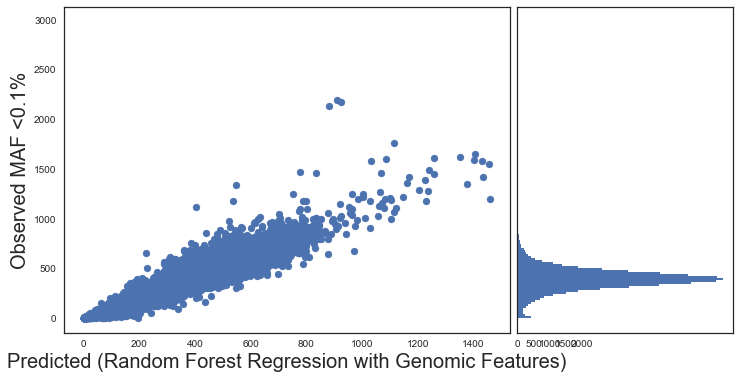

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


x = RFR.predict(X_test)
y = y_test


fig, axScatter = plt.subplots(figsize=(12, 6))

# the scatter plot:
axScatter.scatter(x, y)

plt.xlabel('Predicted (Random Forest Regression with Genomic Features)', size = 20)
plt.ylabel('Observed MAF <0.1%', size = 20)
#ax.tick_params(axis='both', which='major', labelsize=12)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHisty = divider.append_axes("right", 3, pad=0.1, sharey=axScatter)

# make some labels invisible
axHisty.yaxis.set_tick_params(labelleft=False)

axHisty.hist(y, bins=range(0,3000,20), orientation='horizontal')
axHisty.set_xticks([0,500,1000, 1500, 2000])


plt.draw()
plt.show()

In [308]:
importances = RFR.feature_importances_
# = np.std([RFR.feature_importances_ for tree in RFR.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.574631)
2. feature 3 (0.146886)
3. feature 5 (0.048848)
4. feature 10 (0.044948)
5. feature 6 (0.031376)
6. feature 4 (0.025647)
7. feature 7 (0.019964)
8. feature 21 (0.013532)
9. feature 2 (0.013509)
10. feature 8 (0.013052)
11. feature 1 (0.009246)
12. feature 25 (0.006738)
13. feature 22 (0.006471)
14. feature 17 (0.005816)
15. feature 9 (0.005729)
16. feature 16 (0.004475)
17. feature 20 (0.004318)
18. feature 24 (0.004095)
19. feature 23 (0.003930)
20. feature 18 (0.003881)
21. feature 19 (0.003782)
22. feature 14 (0.003683)
23. feature 15 (0.003517)
24. feature 11 (0.001329)
25. feature 12 (0.000355)
26. feature 13 (0.000241)


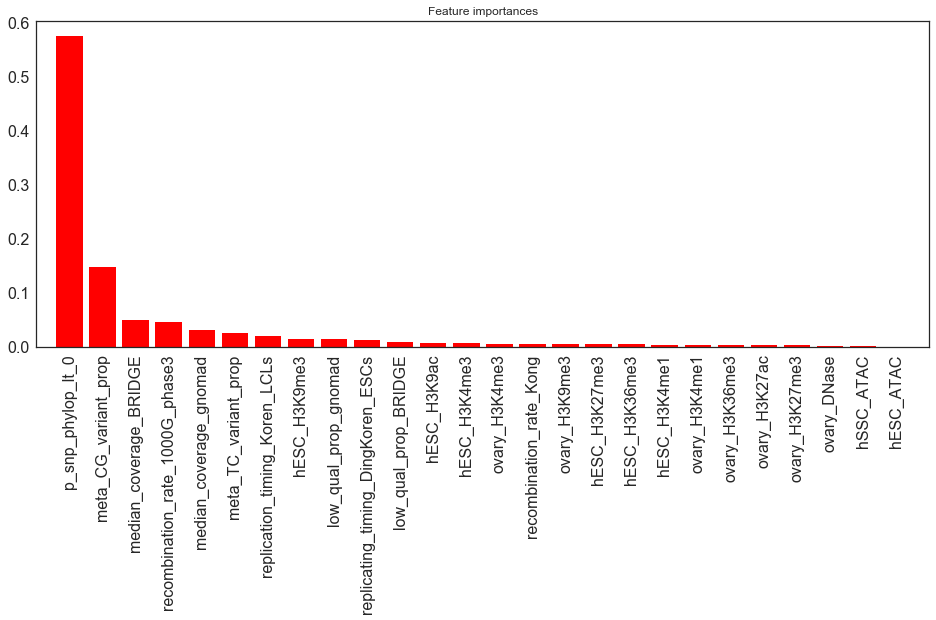

In [309]:
# Plot the feature importances of the forest
f, ax = plt.subplots(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[0]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [153]:
def obs_exp_z_score(observed, expected):
    return (observed - expected)/np.sqrt(expected)

LR.fit(X_train['p_snp_phylop_lt_0'].values.reshape(-1,1), y_train)

y_pred = LR.predict(X['p_snp_phylop_lt_0'].values.reshape(-1,1))
elements['meta_predicted_neutral_triplet_only'] = LR.predict(X['p_snp_phylop_lt_0'].values.reshape(-1,1))
elements['meta_obs_exp_ratio_neutral_triplet_only'] = elements.meta_observed_neutral/elements['meta_predicted_neutral_triplet_only']
elements['meta_z_score_neutral_triplet_only'] = obs_exp_z_score(elements.meta_observed_neutral, elements.meta_predicted_neutral_triplet_only)

In [154]:
#elements['meta_predicted_neutral_RFR_no_spectrum'] = RFR_no_spectrum.predict(X_no_spectrum)
#elements['meta_obs_exp_ratio_neutral_RFR_no_spectrum'] = elements.meta_observed_neutral/elements.meta_predicted_neutral_RFR_no_spectrum
#elements['meta_z_score_neutral_RFR_no_spectrum'] = obs_exp_z_score(elements.meta_observed_neutral, elements.meta_predicted_neutral_RFR_no_spectrum)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [155]:
elements['meta_predicted_neutral_RFR'] = RFR.predict(X)
elements['meta_obs_exp_ratio_neutral_RFR'] = elements.meta_observed_neutral/elements.meta_predicted_neutral_RFR
elements['meta_z_score_neutral_RFR'] = obs_exp_z_score(elements.meta_observed_neutral, elements.meta_predicted_neutral_RFR)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   45.3s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  8.4min finished


In [156]:
elements.to_csv("../data/whole_genome_sliding.2kb_bins.mut_rates.annotated.coverage_added.constraint.RFR_annotated.txt", sep = "\t")

## How many of the 10kb segments are still significantly over/under?

In [54]:
elements_extreme['hypermutable'] = elements_extreme.meta_obs_exp_ratio_neutral_RFR > 1

/Users/ps14/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
elements_extreme[elements_extreme['hypermutable']]

,chr,start,end,chunk,region_id,p_snp_phylop_lt_0,p_snp_phylop_lt_1,p_snp_total,p_snp_phylop_gt_0,p_snp_phylop_gt_1,...,meta_obs_exp_ratio_neutral,meta_z_score_neutral,meta_observed_non_neutral,meta_expected_non_neutral,meta_obs_exp_ratio_non_neutral,meta_z_score_non_neutral,meta_predicted_neutral_RFR,meta_obs_exp_ratio_neutral_RFR,meta_z_score_neutral_RFR,hypermutable
419,chr10,16290001,16300000,10,chr10:16290001-16300000,0.000050,0.000211,0.000220,0.000170,0.000009,...,1.499556,3.480174,691,743.110315,0.929875,-1.376614,268.088243,1.219748,3.598016,True
466,chr10,20590001,20600000,10,chr10:20590001-20600000,0.000099,0.000201,0.000215,0.000116,0.000013,...,1.210148,2.061012,449,506.924039,0.885734,-1.852689,444.915823,1.175503,3.701895,True
604,chr10,32990001,33000000,10,chr10:32990001-33000000,0.000029,0.000214,0.000217,0.000189,0.000004,...,1.771493,4.092706,1144,824.345576,1.387768,8.017543,182.512592,1.227313,3.070930,True
855,chr10,59090001,59100000,10,chr10:59090001-59100000,0.000100,0.000210,0.000224,0.000123,0.000013,...,1.270178,2.671526,626,538.622606,1.162224,2.711265,423.929564,1.316256,6.511577,True
1524,chr10,11900001,11910000,1,chr10:11900001-11910000,0.000109,0.000201,0.000217,0.000109,0.000016,...,1.214089,2.199907,424,474.452784,0.893661,-1.668030,475.298506,1.211870,4.619050,True
1536,chr10,1200001,1210000,1,chr10:1200001-1210000,0.000118,0.000200,0.000218,0.000100,0.000018,...,1.217338,2.332516,379,436.175495,0.868916,-1.971490,542.527524,1.161231,3.755437,True
1715,chr10,14600001,14610000,1,chr10:14600001-14610000,0.000112,0.000202,0.000218,0.000106,0.000017,...,1.151311,1.582731,383,462.717148,0.827719,-2.668758,482.594509,1.172827,3.796675,True
1735,chr10,16400001,16410000,1,chr10:16400001-16410000,0.000087,0.000197,0.000216,0.000128,0.000019,...,1.352651,3.252533,491,561.316261,0.874730,-2.137308,392.699809,1.316527,6.272511,True
1739,chr10,16800001,16810000,1,chr10:16800001-16810000,0.000103,0.000197,0.000219,0.000115,0.000022,...,1.231813,2.323415,449,503.977623,0.890913,-1.763582,459.419294,1.210223,4.505944,True
1745,chr10,17300001,17310000,1,chr10:17300001-17310000,0.000087,0.000205,0.000216,0.000129,0.000011,...,1.300788,2.765314,458,563.283787,0.813089,-3.194575,393.005806,1.256979,5.094446,True


In [ ]:
sns.pairplot(data = elements_extreme.loc[:,['p_snp_phylop_lt_0', 'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'hypermutable']], hue = 'hypermutable')

In [ ]:
sum(elements_extreme.hypermutable)

In [ ]:
sum(elements['meta_z_score_neutral_RFR'] < -3)/elements.shape[0]

In [ ]:
sum(elements['meta_z_score_neutral_RFR'] > 3)/elements.shape[0]

In [ ]:
np.median(elements.recombination_rate_Kong[elements['meta_z_score_neutral_RFR'] > 0])

In [ ]:
np.median(elements_extreme.median_coverage_gnomad[~elements_extreme.hypermutable])

In [ ]:
elements_extreme[elements_extreme.hypermutable].head()

In [ ]:
elements_extreme.loc[:, ['p_snp_phylop_lt_0', 'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'meta_observed_neutral']][elements_extreme.hypermutable]

In [ ]:
np.median(elements_extreme.recombination_rate_1000G_phase3[~elements_extreme.hypermutable])

In [ ]:
np.median(elements_extreme.recombination_rate_1000G_phase3[elements_extreme.hypermutable])

## Load in flagship elements and predict variants with the RFR

In [ ]:
flagship = pd.read_table("../data/chr1_BRIDGE_flagship_all_elements.phylop_mut_rates.annotated_full.coverage_added.constraint.txt")

In [ ]:
flagship.shape

In [ ]:
flagship = flagship.loc[flagship['median_coverage_BRIDGE'] > 30,:]
flagship = flagship.loc[flagship['median_coverage_gnomad'] > 30,:]
flagship = flagship.loc[flagship['low_qual_prop_BRIDGE'] < 0.2,:]
flagship = flagship.loc[flagship['low_qual_prop_gnomad'] < 0.2,:]
flagship.dropna(inplace=True)

In [ ]:
flagship.shape

In [ ]:
flagship['meta_predicted_neutral_RFR'] = RFR.predict(flagship.loc[:, ['p_snp_phylop_lt_0', 'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac']])

In [ ]:
flagship['meta_obs_exp_ratio_neutral_RFR'] = flagship.meta_observed_neutral/flagship.meta_predicted_neutral_RFR
flagship['meta_z_score_neutral_RFR'] = obs_exp_z_score(flagship.meta_observed_neutral, flagship.meta_predicted_neutral_RFR)

In [ ]:
np.median(flagship['meta_obs_exp_ratio_neutral_RFR'])

## Random forest on the residuals

Random forest alone is very similar to the linear model. Instead, we will fit a linear model to the triplet rate, then fit a random forest to the residuals.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
elements.columns.values

In [ ]:
X = elements.loc[:, ['p_snp_phylop_lt_0', 'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'meta_observed_neutral']]

X.dropna(axis=0,inplace=True)
y = X['meta_observed_neutral']
X.drop('meta_observed_neutral', axis = 1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_residual = X_test
y_residual = y_test - LR.predict(X_test['p_snp_phylop_lt_0'].values.reshape(-1,1))

#X_residual = X_residual['replication_timing_Koren_LCLs'].values.reshape(-1,1)

X_residual.drop('p_snp_phylop_lt_0', axis = 1, inplace=True)

X_residual_train, X_residual_test, y_residual_train, y_residual_test = train_test_split(X_residual, y_residual)

In [ ]:
RFR = RandomForestRegressor(n_estimators = 1000, min_samples_split = 10, n_jobs = -1, verbose = 4, max_depth=5)

In [ ]:
RFR.fit(X_residual_train, y_residual_train)

In [ ]:
RFR.score(X_residual_train, y_residual_train)

In [ ]:
RFR.score(X_residual_test, y_residual_test)

In [ ]:
importances = RFR.feature_importances_
std = np.std([RFR.feature_importances_ for tree in RFR.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_residual.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=[14,8])
plt.title("Feature importances")
plt.bar(range(X_residual.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_residual.shape[0]), X_residual.columns[indices], rotation='vertical')
plt.xlim([-1, X_residual.shape[1]])
plt.ax.yaxis.label.set_size(20)
plt.show()

In [ ]:
X_residual.head()

In [ ]:
p = plt.scatter(y_residual_test, RFR.predict(X_residual_test), edgecolor='k',
            c="navy", marker="s", label="Model Prediction")
plt.xlim(min(y_residual_test), max(y_residual_test))

In [ ]:
res = X_residual
res = res.join(y_residual)
res.head()
res = res[abs(res['meta_observed_neutral']) < 50]

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 7))
#ax.set(yscale="log")
s = sns.regplot(data = res, x = "hESC_H3K27me3", y = "meta_observed_neutral", fit_reg = False)
s.set(xlim=(min(elements.hESC_H3K27me3), max(elements.hESC_H3K27me3)))

### We have successfully captured some of the variance in the residuals using a random forest built on a number of genomic features. We can now update the obs/exp to include these additional predictions.

In [ ]:
y_predicted = LR.predict(elements['p_snp_phylop_lt_0'].values.reshape(-1,1))
y_residual_predicted = RFR.predict(elements.loc[:,['replication_timing_Koren_LCLs', 'recombination_rate_1000G_phase3', 'ovary_DNase', 'hSSC_ATAC','hESC_ATAC']])

In [ ]:
predicted_rare_neutral_count_BRIDGE = y_predicted + y_residual_predicted

elements['predicted_rf_rare_neutral_count_BRIDGE'] = predicted_rare_neutral_count_BRIDGE
elements['expanded_model_obs_exp_ratio_lt0'] = elements.observed_rare_neutral_count_BRIDGE/predicted_rare_neutral_count_BRIDGE
elements['expanded_model_z_score_lt0'] = obs_exp_z_score(elements.observed_rare_neutral_count_BRIDGE, predicted_rare_neutral_count_BRIDGE)

In [ ]:
y_residual_predicted

In [ ]:
elements.head()

In [ ]:
elements.to_csv("../data/roadmap_peaks.phylop_mut_rates.DNM_direct.annotated.coverage_added.model_results.lt0.obs_exp_annotated.txt", sep = "\t")

## Grid search to find the best parameters


In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': [1000],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=4, random_state=42, n_jobs = -1)


In [88]:
X = elements.loc[:, ['p_snp_phylop_lt_0', 'replication_timing_Koren_LCLs', 'replicating_timing_DingKoren_ESCs', 'recombination_rate_Kong', 'recombination_rate_1000G_phase3',
       'ovary_DNase', 'hSSC_ATAC', 'hESC_ATAC', 'ovary_H3K27ac',
       'ovary_H3K27me3', 'ovary_H3K9me3', 'ovary_H3K4me3', 'ovary_H3K4me1',
       'ovary_H3K36me3', 'hESC_H3K27me3', 'hESC_H3K9me3', 'hESC_H3K4me3',
       'hESC_H3K4me1', 'hESC_H3K36me3', 'hESC_H3K9ac', 'meta_observed_neutral']]
X.dropna(axis=0,inplace=True)
y = X['meta_observed_neutral']
X.drop('meta_observed_neutral', axis = 1, inplace=True)

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=False, score=0.44667428674829823, total= 9.7min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=90, bootstrap=False, score=0.5986163644908702, total= 9.8min
[CV] n_estimators=1000, min_samples_split=10, m

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 35.0min


[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, score=0.46401021080941984, total= 8.4min
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, score=0.7290013169750973, total= 8.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=150, bootstrap=True 
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=150, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, score=0.729275305438513, total= 6.0min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=150, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, m

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 131.8min


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=130, bootstrap=False, score=0.44799454826508534, total= 6.0min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=130, bootstrap=True, score=0.7230970074200931, total= 3.9min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=130, bootstrap=True, score=0.445069683843617, total= 3.8min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=170, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.6033478832801635, total= 4.3min
[CV] n_estimators=1000, min_samp

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 297.5min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, score=0.46497142873852576, total= 4.5min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=130, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=170, bootstrap=True, score=0.7232848887121432, total= 3.9min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=130, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=170, bootstrap=True, score=0.4456551165950052, total= 3.9min
[CV] n_estimators=1000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=210, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=130, bootstrap=True, score=0.6036958258695089, total= 4.4min
[CV] n_estimators=1000, min_s

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 433.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [1000], 'max_features': ['sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=4)

In [89]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
RFR = RandomForestRegressor(max_depth = 50, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1000, verbose = 4)

In [ ]:
RFR.fit(X_residual_train, y_residual_train)

In [ ]:
RFR.score(X_residual_test, y_residual_test)

In [ ]:
sum(y_residual[X_residual['hESC_ATAC'] == 0])

In [ ]:
sum(abs(y_residual))

In [ ]:
np.median(np.sum(elements.observed_rare_neutral_count_BRIDGE[elements.hESC_ATAC == 0])/np.sum(elements.p_snp_phylop_lt_0[elements.hESC_ATAC == 0]))

In [ ]:
np.median(np.sum(elements.observed_rare_neutral_count_BRIDGE[elements.hESC_ATAC > 0.8])/np.sum(elements.p_snp_phylop_lt_0[elements.hESC_ATAC > 0.8]))

In [ ]:
np.median(np.sum(elements.observed_rare_neutral_count_BRIDGE[elements.hESC_ATAC == 0])/np.sum(elements.p_snp_phylop_lt_0[elements.hESC_ATAC == 0]))

In [ ]:
elements[elements.hESC_ATAC == 1].head()